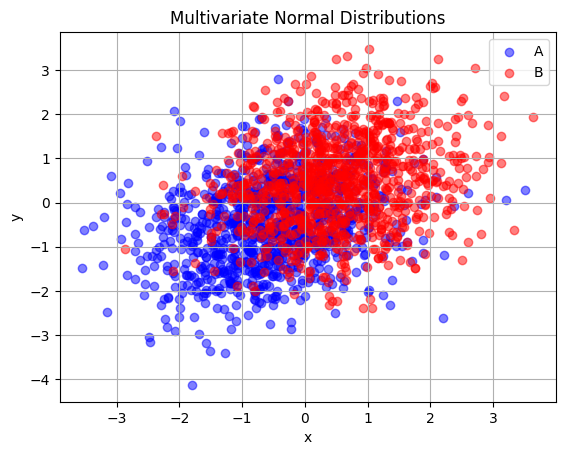

In [16]:
# Simulation of Multivariate Normal Distribution
#Adrian Otieno
#9/22/2024
# CS 370
import torch
import matplotlib.pyplot as plt

meanA = torch.tensor([-0.5, -0.5])
covA = torch.tensor([[1, 0.25], [0.25, 1]])
meanB = torch.tensor([0.5, 0.5])
covB = torch.tensor([[1, 0.25], [0.25, 1]])
dist_A = torch.distributions.MultivariateNormal(meanA, covA)
dist_B = torch.distributions.MultivariateNormal(meanB, covB)
samples_A = dist_A.sample((1000,))
samples_B = dist_B.sample((1000,))

X = torch.cat([samples_A, samples_B], dim=0)

plt.scatter(samples_A[:, 0], samples_A[:, 1], color='blue', label='A', alpha=0.5)
plt.scatter(samples_B[:, 0], samples_B[:, 1], color='red', label='B', alpha=0.5)
plt.title('Multivariate Normal Distributions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Convergence in 16 iterations.


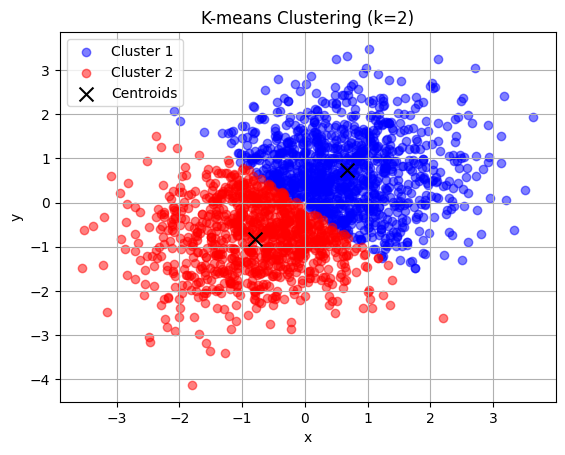

In [17]:
# K-Means Clustering

def centroids_labels(X, k=2, max_iters=100, tol=1e-4):
    centroids = X[torch.randperm(X.size(0))[:k]]

    for iteration in range(max_iters):
        distances = torch.cdist(X, centroids)
        labels = torch.argmin(distances, dim=1)
        new_centroids = torch.stack([X[labels == i].mean(dim=0) for i in range(k)])

        if torch.all(torch.abs(new_centroids - centroids) < tol):
            print(f'Convergence in {iteration} iterations.')
            break

        centroids = new_centroids

    return labels, centroids

labels, centroids = centroids_labels(X, k=2)
plt.scatter(X[labels == 0][:, 0], X[labels == 0][:, 1], color='blue', label='Cluster 1', alpha=0.5)
plt.scatter(X[labels == 1][:, 0], X[labels == 1][:, 1], color='red', label='Cluster 2', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', label='Centroids', s=100)
plt.title(f'K-means Clustering (k=2)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
#Projection with Principal Components Analysis (PCA)

import numpy as np
import matplotlib.pyplot as plt

Y = np.random.normal(0, 1, (100, 4))
Y[:,2] = 3 * Y[:,0] - 2 * Y[:,1] + np.random.normal(0,0.1,100)
Y[:,3] = 1.5 * Y[:,0] - 0.5 * Y[:,1] + np.random.normal(0,0.1,100)
Y2 = torch.tensor(Y, dtype=torch.float32)
Y_mean = torch.mean(Y2, dim=0)
Y_center = Y2 - Y_mean
cov_matrix = torch.matmul(Y_center.T, Y_center) / (Y_center.size(0) - 1)
eigenvalues, eigenvectors = torch.linalg.eigh(cov_matrix)
sorted_indices = torch.argsort(eigenvalues, descending=True)
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

print("\nEigenvalues:")
print(eigenvalues)
print("\Eigenvectors:")
print(eigenvectors)



Eigenvalues:
tensor([1.3588e+01, 1.2935e+00, 8.6217e-03, 6.6493e-04])
\Eigenvectors:
tensor([[-0.2221,  0.4770, -0.1939,  0.8280],
        [ 0.1101,  0.8022, -0.3017, -0.5033],
        [-0.8876, -0.1604, -0.3648, -0.2311],
        [-0.3883,  0.3212,  0.8593, -0.0880]])
